In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

from sklearn.metrics import classification_report, accuracy_score
import random
random.seed(100)

import time
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


## Feature Eng


In [52]:
data = pd.read_csv(r'../data/interim/training_data.csv')
data.head()

,Unnamed: 0,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count
0,0,BENE11001,CLM46614,PRV55912,26000,1068.0,6,6,9.0,0.0,0.0,0,1,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
1,1,BENE11001,CLM66048,PRV55907,5000,1068.0,2,2,3.0,1.0,1.0,0,0,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
2,2,BENE11001,CLM68358,PRV56046,5000,1068.0,3,3,6.0,0.0,0.0,0,0,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
3,3,BENE11011,CLM38412,PRV52405,5000,1068.0,8,8,9.0,1.0,0.0,0,0,1914-03-01,2009-12-01,Female,Black or African American,0,Alabama,360,12,12,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,5000,1068,250,320,1914,96.0,0,6.0
4,4,BENE11014,CLM63689,PRV56614,10000,1068.0,17,17,9.0,1.0,0.0,0,0,1938-04-01,2009-12-01,Female,White,1,Utah,780,12,12,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,21260,2136,120,100,1938,72.0,0,5.0


In [53]:
# Encoding Categorical Variables
cat_cols = ['SamePhysician', 'OPD_Flag', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

In [54]:
data['RenalDiseaseIndicator'] = data['RenalDiseaseIndicator'].replace({0:'No', 1:'Yes'})
data['OPD_Flag'] = data['OPD_Flag'].replace({0:'No', 1:'Yes'})
data['SamePhysician'] = data['SamePhysician'].astype(int).replace({0:'No', 1:'Yes'})

In [8]:
#data = pd.get_dummies(data, columns=cat_cols,drop_first=True)

In [9]:
data.head()

,Unnamed: 0,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,PotentialFraud,DOB,DOD,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count,SamePhysician_Yes,OPD_Flag_Yes,Gender_Male,Race_Hispanic,Race_Other,Race_White,RenalDiseaseIndicator_Yes,ChronicCond_Alzheimer_Yes,ChronicCond_Heartfailure_Yes,ChronicCond_KidneyDisease_Yes,ChronicCond_Cancer_Yes,ChronicCond_ObstrPulmonary_Yes,ChronicCond_Depression_Yes,ChronicCond_Diabetes_Yes,ChronicCond_IschemicHeart_Yes,ChronicCond_Osteoporasis_Yes,ChronicCond_rheumatoidarthritis_Yes,ChronicCond_stroke_Yes
0,0,BENE11001,CLM46614,PRV55912,26000,1068.0,6,6,9.0,0.0,1,1943-01-01,2009-12-01,Pennsylvania,230,12,12,36000,3204,60,70,1943,67.0,0,7.0,False,False,True,False,False,True,False,True,False,True,False,False,True,True,True,False,True,True
1,1,BENE11001,CLM66048,PRV55907,5000,1068.0,2,2,3.0,1.0,0,1943-01-01,2009-12-01,Pennsylvania,230,12,12,36000,3204,60,70,1943,67.0,0,7.0,True,False,True,False,False,True,False,True,False,True,False,False,True,True,True,False,True,True
2,2,BENE11001,CLM68358,PRV56046,5000,1068.0,3,3,6.0,0.0,0,1943-01-01,2009-12-01,Pennsylvania,230,12,12,36000,3204,60,70,1943,67.0,0,7.0,False,False,True,False,False,True,False,True,False,True,False,False,True,True,True,False,True,True
3,3,BENE11011,CLM38412,PRV52405,5000,1068.0,8,8,9.0,1.0,0,1914-03-01,2009-12-01,Alabama,360,12,12,5000,1068,250,320,1914,96.0,0,6.0,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True
4,4,BENE11014,CLM63689,PRV56614,10000,1068.0,17,17,9.0,1.0,0,1938-04-01,2009-12-01,Utah,780,12,12,21260,2136,120,100,1938,72.0,0,5.0,False,False,False,False,False,True,True,False,True,True,False,True,True,False,True,False,False,False


In [55]:
del data['Unnamed: 0']

In [56]:
data = data[data['IPAnnualReimbursementAmt'] >=0].reset_index(drop=True)
data = data[data['OPAnnualReimbursementAmt'] >= 0].reset_index(drop=True)
data = data[data['DeductibleAmtPaid'] >= 0].reset_index(drop=True)


In [57]:
def treat_outliers(df, columns):
   
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        print('lower', lower_bound)

        upper_bound = Q3 + 1.5 * IQR
        print('upper', upper_bound)
        # Cap outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
 
columns = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']
data = treat_outliers(data, columns)

lower -350.0
upper 690.0
lower -8550.0
upper 14250.0
lower -1602.0
upper 2670.0
lower -2735.0
upper 5785.0
lower -885.0
upper 1795.0


In [58]:
# Total Claims per Beneficiary

data['Total_Claims_Per_Bene'] = data.groupby('BeneID')['ClaimID'].transform('count')


In [59]:
# Average Reimbursement Amount per Beneficiary

data['Avg_Reimbursement_Per_Bene'] = data.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')


In [60]:
#Age at Claim

# Convert DOB and ClaimPeriod to datetime
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y', errors='coerce')
#data['ClaimPeriod'] = pd.to_datetime(data['ClaimPeriod'], format='%m/%d/%Y', errors='coerce')

# Handle any conversion errors if necessary
data['DOB'].fillna(pd.to_datetime('1/1/1900'), inplace=True)  # Example placeholder

# Calculate Age at Claim
data['Age_At_Claim'] = data.apply(lambda row: 
                                  (row['ClaimPeriod'] - row['DOB']).days // 365 if row['DOB'] != pd.Timestamp('1900-01-01') else row['Age'], axis=1)


C:\Users\sapna\AppData\Local\Temp\ipykernel_31752\137632896.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DOB'].fillna(pd.to_datetime('1/1/1900'), inplace=True)  # Example placeholder


In [16]:
data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count,Total_Claims_Per_Bene,Avg_Reimbursement_Per_Bene,Age_At_Claim
0,BENE11001,CLM46614,PRV55912,26000,1068.0,NaT,6,9.0,0.0,0.0,0,1,1900-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0,3,12000.0,67.0
1,BENE11001,CLM66048,PRV55907,5000,1068.0,NaT,2,3.0,1.0,1.0,0,0,1900-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0,3,12000.0,67.0
2,BENE11001,CLM68358,PRV56046,5000,1068.0,NaT,3,6.0,0.0,0.0,0,0,1900-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0,3,12000.0,67.0
3,BENE11011,CLM38412,PRV52405,5000,1068.0,NaT,8,9.0,1.0,0.0,0,0,1900-01-01,2009-12-01,Female,Black or African American,0,Alabama,360,12,12,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,5000,1068,250,320,1914,96.0,0,6.0,4,1295.0,96.0
4,BENE11014,CLM63689,PRV56614,10000,1068.0,NaT,17,9.0,1.0,0.0,0,0,1900-01-01,2009-12-01,Female,White,1,Utah,780,12,12,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,21260,2136,120,100,1938,72.0,0,5.0,2,5030.0,72.0


In [61]:
#Multiple Chronic Conditions

data['Multiple_Chronic_Conditions'] = (data['ChronicDisease_Count'] > 1).astype(int)


In [62]:
#Claim to Deductible Ratio

data['Claim_To_Deductible_Ratio'] = data['InscClaimAmtReimbursed'] / (data['DeductibleAmtPaid'] + 1)  # +1 to avoid division by zero


In [63]:
del data['Claim_To_Deductible_Ratio']

In [64]:
#Total Annual Reimbursement

data['Total_Annual_Reimbursement'] = data['IPAnnualReimbursementAmt'] + data['OPAnnualReimbursementAmt']


In [65]:
#Average Claim Amount by Provider

provider_cols = [col for col in data.columns if 'Provider_' in col]
data['Avg_Reimbursement_By_Provider'] = data[provider_cols].multiply(data['InscClaimAmtReimbursed'], axis=0).sum(axis=1) / (data[provider_cols].sum(axis=1) + 1)


In [66]:
#Provider Claim Frequency

data['Provider_Claim_Frequency'] = data.groupby('Provider')['ClaimID'].transform('count')


In [67]:
data.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'ClaimPeriod', 'TimeInHptal', 'Diagnosis Count',
       'Procedures Count', 'SamePhysician', 'OPD_Flag', 'PotentialFraud',
       'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'BirthYear', 'Age', 'Alive',
       'ChronicDisease_Count', 'Total_Claims_Per_Bene',
       'Avg_Reimbursement_Per_Bene', 'Age_At_Claim',
       'Multiple_Chronic_Conditions', 'Total_Annu

In [176]:
# data[['Gender_Male','Provider_Claim_Frequency', 'PotentialFraud']].to_clipboard()

In [68]:
#Flag High-Risk Providers

# Calculate average reimbursement per provider
provider_avg_reimb = data.groupby('Provider')['InscClaimAmtReimbursed'].mean()
high_risk_providers = provider_avg_reimb[provider_avg_reimb > provider_avg_reimb.quantile(0.95)].index.tolist()

data['High_Risk_Provider'] = data['Provider'].apply(lambda x: 1 if x in high_risk_providers else 0)


In [51]:
#data = data.drop(['BeneID', 'ClaimID','Provider', 'DOB','DOD','ClaimPeriod'], axis=1)


In [163]:
#data = data.drop(['State', 'County'], axis=1)


In [69]:
data.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,PotentialFraud,DOB,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count,Total_Claims_Per_Bene,Avg_Reimbursement_Per_Bene,Age_At_Claim,Multiple_Chronic_Conditions,Total_Annual_Reimbursement,Avg_Reimbursement_By_Provider,Provider_Claim_Frequency,High_Risk_Provider
count,557240.000000,557240.000000,0,557240.000000,557240.000000,557240.000000,557240.000000,557240,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.0,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.0,557240.000000,557240.0
mean,213.544021,78.401985,NaT,0.397233,3.002207,0.052362,0.380917,1900-01-01 00:00:00.000000256,378.577807,11.931532,11.938753,3241.515092,500.276556,1775.496357,533.798297,1935.723993,73.768934,0.0,4.495198,6.604960,213.544021,73.768934,0.886564,5017.011449,0.0,822.717493,0.0
min,0.000000,0.000000,NaT,0.000000,0.000000,0.000000,0.000000,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1909.000000,26.000000,0.0,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.0,1.000000,0.0
25%,40.000000,0.000000,NaT,0.000000,1.000000,0.000000,0.000000,1900-01-01 00:00:00,150.000000,12.000000,12.000000,0.000000,0.000000,460.000000,120.000000,1927.000000,68.000000,0.0,3.000000,3.000000,110.000000,68.000000,1.000000,710.000000,0.0,122.000000,0.0
50%,80.000000,0.000000,NaT,0.000000,2.000000,0.000000,0.000000,1900-01-01 00:00:00,350.000000,12.000000,12.000000,0.000000,0.000000,1170.000000,340.000000,1935.000000,75.000000,0.0,4.000000,6.000000,191.666667,75.000000,1.000000,2310.000000,0.0,361.000000,0.0
75%,300.000000,0.000000,NaT,0.000000,4.000000,0.000000,1.000000,1900-01-01 00:00:00,570.000000,12.000000,12.000000,5700.000000,1068.000000,2590.000000,790.000000,1941.000000,82.000000,0.0,6.000000,9.000000,281.250000,82.000000,1.000000,7410.000000,0.0,1013.000000,0.0
max,690.000000,1068.000000,NaT,35.000000,10.000000,5.000000,1.000000,1900-01-01 00:00:00,999.000000,12.000000,12.000000,14250.000000,2670.000000,5785.000000,1795.000000,1983.000000,101.000000,0.0,11.000000,29.000000,690.000000,101.000000,1.000000,20035.000000,0.0,8240.000000,0.0
std,248.056362,273.985337,NaN,2.061639,2.439777,0.277317,0.485613,NaN,265.223469,0.889318,0.786028,5234.177103,784.435859,1692.427577,526.200176,13.010535,13.021200,0.0,2.331492,4.081212,138.459511,13.021200,0.317125,5705.707451,0.0,1276.159398,0.0


In [133]:
data[(data['IPAnnualReimbursementAmt'] <= 0) & (data['IPAnnualDeductibleAmt'] <= 0)].shape

(369243, 42)

In [134]:
data[(data['OPAnnualDeductibleAmt'] < 0) & (data['OPAnnualReimbursementAmt'] < 0)].shape


(0, 42)

In [27]:
data = data[data['OPAnnualReimbursementAmt'] >= 0].reset_index(drop=True)

In [32]:
def treat_outliers(df, columns):
   
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        print('lower', lower_bound)

        upper_bound = Q3 + 1.5 * IQR
        print('upper', upper_bound)
        # Cap outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
 

In [33]:
columns = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']
data = treat_outliers(data, columns)

lower -350.0
upper 690.0
lower -9000.0
upper 15000.0
lower -1602.0
upper 2670.0
lower -2735.0
upper 5785.0
lower -885.0
upper 1795.0


In [71]:
data = pd.read_csv(r'../data/interim/training_data.csv')
data.head()
# Encoding Categorical Variables
cat_cols = ['SamePhysician', 'OPD_Flag', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
data['RenalDiseaseIndicator'] = data['RenalDiseaseIndicator'].replace({0:'No', 1:'Yes'})
data['OPD_Flag'] = data['OPD_Flag'].replace({0:'No', 1:'Yes'})
data['SamePhysician'] = data['SamePhysician'].astype(int).replace({0:'No', 1:'Yes'})
#data = pd.get_dummies(data, columns=cat_cols,drop_first=True)
data.head()
del data['Unnamed: 0']
data = data[data['IPAnnualReimbursementAmt'] >=0].reset_index(drop=True)
data = data[data['OPAnnualReimbursementAmt'] >= 0].reset_index(drop=True)
data = data[data['DeductibleAmtPaid'] >= 0].reset_index(drop=True)

def treat_outliers(df, columns):
   
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        print('lower', lower_bound)

        upper_bound = Q3 + 1.5 * IQR
        print('upper', upper_bound)
        # Cap outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
 
columns = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']
data = treat_outliers(data, columns)
# Total Claims per Beneficiary

data['Total_Claims_Per_Bene'] = data.groupby('BeneID')['ClaimID'].transform('count')

# Average Reimbursement Amount per Beneficiary

data['Avg_Reimbursement_Per_Bene'] = data.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')

#Age at Claim

# Convert DOB and ClaimPeriod to datetime
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y', errors='coerce')
#data['ClaimPeriod'] = pd.to_datetime(data['ClaimPeriod'], format='%m/%d/%Y', errors='coerce')

# Handle any conversion errors if necessary
data['DOB'].fillna(pd.to_datetime('1/1/1900'), inplace=True)  # Example placeholder

# Calculate Age at Claim
data['Age_At_Claim'] = data.apply(lambda row: 
                                  (row['ClaimPeriod'] - row['DOB']).days // 365 if row['DOB'] != pd.Timestamp('1900-01-01') else row['Age'], axis=1)

data.head()
#Multiple Chronic Conditions

data['Multiple_Chronic_Conditions'] = (data['ChronicDisease_Count'] > 1).astype(int)

#Claim to Deductible Ratio

data['Claim_To_Deductible_Ratio'] = data['InscClaimAmtReimbursed'] / (data['DeductibleAmtPaid'] + 1)  # +1 to avoid division by zero

#del data['Claim_To_Deductible_Ratio']
#Total Annual Reimbursement

data['Total_Annual_Reimbursement'] = data['IPAnnualReimbursementAmt'] + data['OPAnnualReimbursementAmt']

#Average Claim Amount by Provider

provider_cols = [col for col in data.columns if 'Provider_' in col]
data['Avg_Reimbursement_By_Provider'] = data[provider_cols].multiply(data['InscClaimAmtReimbursed'], axis=0).sum(axis=1) / (data[provider_cols].sum(axis=1) + 1)

#Provider Claim Frequency

data['Provider_Claim_Frequency'] = data.groupby('Provider')['ClaimID'].transform('count')

data.columns
# data[['Gender_Male','Provider_Claim_Frequency', 'PotentialFraud']].to_clipboard()
#Flag High-Risk Providers

# Calculate average reimbursement per provider
provider_avg_reimb = data.groupby('Provider')['InscClaimAmtReimbursed'].mean()
high_risk_providers = provider_avg_reimb[provider_avg_reimb > provider_avg_reimb.quantile(0.95)].index.tolist()

data['High_Risk_Provider'] = data['Provider'].apply(lambda x: 1 if x in high_risk_providers else 0)

#data = data.drop(['BeneID', 'ClaimID','Provider', 'DOB','DOD','ClaimPeriod'], axis=1)

#data = data.drop(['State', 'County'], axis=1)

data.describe()

lower -350.0
upper 690.0
lower -8550.0
upper 14250.0
lower -1602.0
upper 2670.0
lower -2735.0
upper 5785.0
lower -885.0
upper 1795.0


C:\Users\sapna\AppData\Local\Temp\ipykernel_31752\4126685913.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DOB'].fillna(pd.to_datetime('1/1/1900'), inplace=True)  # Example placeholder


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,PotentialFraud,DOB,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count,Total_Claims_Per_Bene,Avg_Reimbursement_Per_Bene,Age_At_Claim,Multiple_Chronic_Conditions,Claim_To_Deductible_Ratio,Total_Annual_Reimbursement,Avg_Reimbursement_By_Provider,Provider_Claim_Frequency,High_Risk_Provider
count,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.0,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.0,557240.000000,557240.0
mean,213.544021,78.401985,1.716442,0.397233,3.002207,0.052362,0.380917,1900-01-01 00:00:00.000000256,378.577807,11.931532,11.938753,3241.515092,500.276556,1775.496357,533.798297,1935.723993,73.768934,0.0,4.495198,6.604960,213.544021,73.768934,0.886564,159.707479,5017.011449,0.0,822.717493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1909.000000,26.000000,0.0,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
25%,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1900-01-01 00:00:00,150.000000,12.000000,12.000000,0.000000,0.000000,460.000000,120.000000,1927.000000,68.000000,0.0,3.000000,3.000000,110.000000,68.000000,1.000000,20.000000,710.000000,0.0,122.000000,0.0
50%,80.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1900-01-01 00:00:00,350.000000,12.000000,12.000000,0.000000,0.000000,1170.000000,340.000000,1935.000000,75.000000,0.0,4.000000,6.000000,191.666667,75.000000,1.000000,60.000000,2310.000000,0.0,361.000000,0.0
75%,300.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1900-01-01 00:00:00,570.000000,12.000000,12.000000,5700.000000,1068.000000,2590.000000,790.000000,1941.000000,82.000000,0.0,6.000000,9.000000,281.250000,82.000000,1.000000,200.000000,7410.000000,0.0,1013.000000,0.0
max,690.000000,1068.000000,36.000000,35.000000,10.000000,5.000000,1.000000,1900-01-01 00:00:00,999.000000,12.000000,12.000000,14250.000000,2670.000000,5785.000000,1795.000000,1983.000000,101.000000,0.0,11.000000,29.000000,690.000000,101.000000,1.000000,690.000000,20035.000000,0.0,8240.000000,0.0
std,248.056362,273.985337,4.889660,2.061639,2.439777,0.277317,0.485613,NaN,265.223469,0.889318,0.786028,5234.177103,784.435859,1692.427577,526.200176,13.010535,13.021200,0.0,2.331492,4.081212,138.459511,13.021200,0.317125,214.859213,5705.707451,0.0,1276.159398,0.0


In [72]:
data.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,PotentialFraud,DOB,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count,Total_Claims_Per_Bene,Avg_Reimbursement_Per_Bene,Age_At_Claim,Multiple_Chronic_Conditions,Claim_To_Deductible_Ratio,Total_Annual_Reimbursement,Avg_Reimbursement_By_Provider,Provider_Claim_Frequency,High_Risk_Provider
count,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.0,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.000000,557240.0,557240.000000,557240.0
mean,213.544021,78.401985,1.716442,0.397233,3.002207,0.052362,0.380917,1900-01-01 00:00:00.000000256,378.577807,11.931532,11.938753,3241.515092,500.276556,1775.496357,533.798297,1935.723993,73.768934,0.0,4.495198,6.604960,213.544021,73.768934,0.886564,159.707479,5017.011449,0.0,822.717493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1909.000000,26.000000,0.0,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
25%,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1900-01-01 00:00:00,150.000000,12.000000,12.000000,0.000000,0.000000,460.000000,120.000000,1927.000000,68.000000,0.0,3.000000,3.000000,110.000000,68.000000,1.000000,20.000000,710.000000,0.0,122.000000,0.0
50%,80.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1900-01-01 00:00:00,350.000000,12.000000,12.000000,0.000000,0.000000,1170.000000,340.000000,1935.000000,75.000000,0.0,4.000000,6.000000,191.666667,75.000000,1.000000,60.000000,2310.000000,0.0,361.000000,0.0
75%,300.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1900-01-01 00:00:00,570.000000,12.000000,12.000000,5700.000000,1068.000000,2590.000000,790.000000,1941.000000,82.000000,0.0,6.000000,9.000000,281.250000,82.000000,1.000000,200.000000,7410.000000,0.0,1013.000000,0.0
max,690.000000,1068.000000,36.000000,35.000000,10.000000,5.000000,1.000000,1900-01-01 00:00:00,999.000000,12.000000,12.000000,14250.000000,2670.000000,5785.000000,1795.000000,1983.000000,101.000000,0.0,11.000000,29.000000,690.000000,101.000000,1.000000,690.000000,20035.000000,0.0,8240.000000,0.0
std,248.056362,273.985337,4.889660,2.061639,2.439777,0.277317,0.485613,NaN,265.223469,0.889318,0.786028,5234.177103,784.435859,1692.427577,526.200176,13.010535,13.021200,0.0,2.331492,4.081212,138.459511,13.021200,0.317125,214.859213,5705.707451,0.0,1276.159398,0.0


In [73]:
data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count,Total_Claims_Per_Bene,Avg_Reimbursement_Per_Bene,Age_At_Claim,Multiple_Chronic_Conditions,Claim_To_Deductible_Ratio,Total_Annual_Reimbursement,Avg_Reimbursement_By_Provider,Provider_Claim_Frequency,High_Risk_Provider
0,BENE11001,CLM46614,PRV55912,690.0,1068.0,6,6,9.0,0.0,No,No,1,1900-01-01,2009-12-01,Male,White,No,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,14250.0,2670.0,60.0,70.0,1943,67.0,0,7.0,3,690.0,67.0,1,0.645463,14310.0,0.0,107,0
1,BENE11001,CLM66048,PRV55907,690.0,1068.0,2,2,3.0,1.0,Yes,No,0,1900-01-01,2009-12-01,Male,White,No,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,14250.0,2670.0,60.0,70.0,1943,67.0,0,7.0,3,690.0,67.0,1,0.645463,14310.0,0.0,243,0
2,BENE11001,CLM68358,PRV56046,690.0,1068.0,3,3,6.0,0.0,No,No,0,1900-01-01,2009-12-01,Male,White,No,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,14250.0,2670.0,60.0,70.0,1943,67.0,0,7.0,3,690.0,67.0,1,0.645463,14310.0,0.0,20,0
3,BENE11011,CLM38412,PRV52405,690.0,1068.0,8,8,9.0,1.0,No,No,0,1900-01-01,2009-12-01,Female,Black or African American,No,Alabama,360,12,12,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,5000.0,1068.0,250.0,320.0,1914,96.0,0,6.0,4,217.5,96.0,1,0.645463,5250.0,0.0,89,0
4,BENE11014,CLM63689,PRV56614,690.0,1068.0,17,17,9.0,1.0,No,No,0,1900-01-01,2009-12-01,Female,White,Yes,Utah,780,12,12,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,14250.0,2136.0,120.0,100.0,1938,72.0,0,5.0,2,375.0,72.0,1,0.645463,14370.0,0.0,24,0


In [74]:
data.to_csv('../data/interim/model_data_new.csv')

In [177]:
# X = data.drop(columns='PotentialFraud')
X = data.drop(columns={'PotentialFraud', 'Provider_Claim_Frequency'})
y = data['PotentialFraud']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify=y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (390068, 40)
X_test: (167172, 40)
y_train: (390068,)
y_test: (167172,)


Confusion Matrix:
[[84756 18737]
 [31451 32228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77    103493
           1       0.63      0.51      0.56     63679

    accuracy                           0.70    167172
   macro avg       0.68      0.66      0.67    167172
weighted avg       0.69      0.70      0.69    167172


ROC AUC Score:
0.7353908822719062


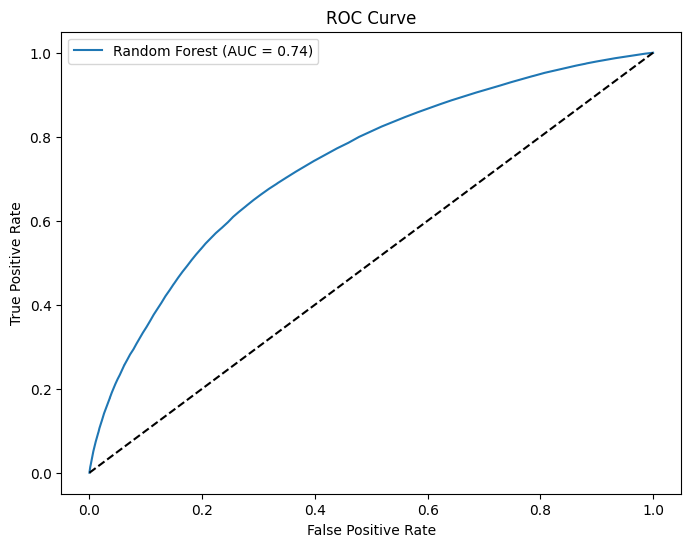

In [181]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

 # Calculate metrics

# Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


--- Training Data Evaluation ---
Confusion Matrix:
[[240316   1169]
 [  1606 146977]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    241485
           1       0.99      0.99      0.99    148583

    accuracy                           0.99    390068
   macro avg       0.99      0.99      0.99    390068
weighted avg       0.99      0.99      0.99    390068


ROC AUC Score:
0.9998164796774677


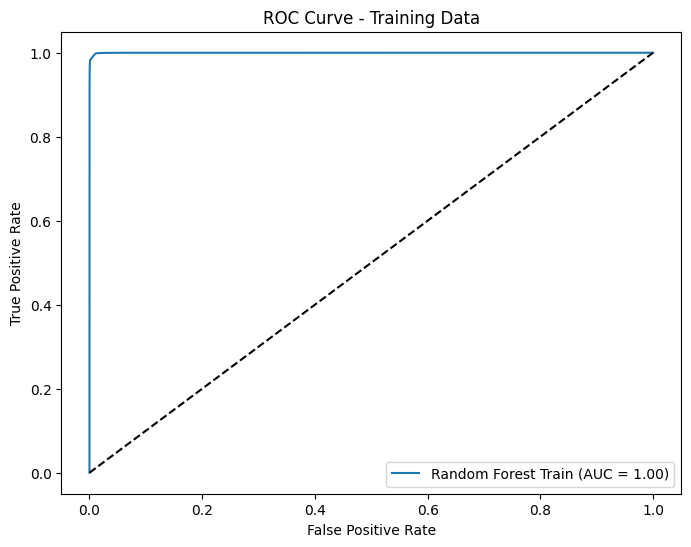

In [182]:
# Predict on training data
y_train_pred = rf.predict(X_train)
y_train_pred_proba = rf.predict_proba(X_train)[:,1]

# Evaluation Metrics for Training Data
print("\n--- Training Data Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_train, y_train_pred_proba))

# Plot ROC Curve for Training Data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f'Random Forest Train (AUC = {roc_auc_score(y_train, y_train_pred_proba):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend()
plt.show()

In [172]:
importances = rf.feature_importances_

# Create a pandas Series with feature names and their corresponding importance scores
feature_names = X_train.columns  # Replace with your actual feature names if different
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


In [173]:
feature_importances

Provider_Claim_Frequency               0.925356
TimeInHptal                            0.015372
DeductibleAmtPaid                      0.011578
OPD_Flag_Yes                           0.007729
Procedures Count                       0.005260
Diagnosis Count                        0.004219
Total_Claims_Per_Bene                  0.003269
Total_Annual_Reimbursement             0.002819
InscClaimAmtReimbursed                 0.002670
Avg_Reimbursement_Per_Bene             0.002486
OPAnnualReimbursementAmt               0.002174
OPAnnualDeductibleAmt                  0.001889
IPAnnualReimbursementAmt               0.001859
BirthYear                              0.001626
Age                                    0.001564
Age_At_Claim                           0.001509
IPAnnualDeductibleAmt                  0.001240
Race_Other                             0.001130
ChronicDisease_Count                   0.001126
SamePhysician_Yes                      0.000970
Race_Hispanic                          0

### Setting up SQL database

In [4]:
def query_data(conn, query):
    """
    Execute a SQL query and fetch results as a pandas DataFrame.
    
    Parameters:
    - conn: A pyodbc connection object.
    - query (str): The SQL query to be executed.
    
    Returns:
    - df: A pandas DataFrame containing the query result.
    """
    start_time = time.time()  # Start time measurement
    try:
        cursor = conn.cursor()
        cursor.execute(query)
        
        # Fetch all results from the query
        rows = cursor.fetchall()
        
        # Get column names from cursor
        columns = [desc[0] for desc in cursor.description]
        
        # Create a pandas DataFrame from the results
        df = pd.DataFrame.from_records(rows, columns=columns)
        
    except pyodbc.Error as e:
        print(f"Error executing query: {e}")
        return None
    
    finally:
        cursor.close()
    
    end_time = time.time()  # End time measurement
    execution_time = end_time - start_time  # Calculate execution time
    
    # Print the DataFrame and execution time
    print(f"Query executed in: {execution_time:.4f} seconds")
    
    return df  

In [4]:
server = 'SAPNA\SQLEXPRESS'     
database = 'MedicareClaim'  

In [5]:
def create_sql_connection_win_auth(server, database):
    connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
    conn = pyodbc.connect(connection_string)
    return conn

server = 'SAPNA\\SQLEXPRESS'
database = 'MedicareClaim'

conn = create_sql_connection_win_auth(server, database)

### Set Up MLflow Tracking with SQL Database

In [12]:
import mlflow
import mlflow.sklearn

try: 
    # Set MLflow Tracking URI using SQL Server and Windows Authentication
    mlflow.set_tracking_uri("mssql+pyodbc://SAPNA\\SQLEXPRESS/MedicareClaim?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")

    # Name the experiment
    mlflow.set_experiment("MedicareClaim_Fraud_Detection")
except Exception as e:
    print(f"Connection failed: {e}")


In [13]:
import mlflow
import mlflow.sklearn
from sqlalchemy import create_engine, text
import pandas as pd

# Use a raw string to handle backslashes in the server name
mlflow_tracking_uri = (
    r"mssql+pyodbc://SAPNA\SQLEXPRESS/MedicareClaim"
    "?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# Set the MLflow Tracking URI
mlflow.set_tracking_uri(mlflow_tracking_uri)

try:
    # Create an SQLAlchemy engine
    engine = create_engine(mlflow_tracking_uri)

    # Test the connection by running a simple query
    with engine.connect() as connection:
        # Use the text() function to create a SQL statement
        query = text("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES")
        result = connection.execute(query)

        # Fetch all the results and display them
        tables = result.fetchall()

        # Print the list of tables
        print("Connection successful! Here are the tables in the database:")
        for table in tables:
            print(table[0])

    # Name the experiment (if connection is successful)
    mlflow.set_experiment("MedicareClaim_Fraud_Detection")

except Exception as e:
    print(f"Connection failed: {e}")


Connection successful! Here are the tables in the database:
experiments
runs
tags
metrics
params
alembic_version
experiment_tags
latest_metrics
registered_models
model_versions
registered_model_tags
model_version_tags
registered_model_aliases
datasets
inputs
input_tags
trace_info
trace_tags
trace_request_metadata


### Importing data

In [60]:
data = pd.read_csv(r'../data/interim/model_data.csv')
data.head()

,Unnamed: 0,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag,PotentialFraud,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ChronicDisease_Count
0,0,CLM46614,PRV55912,690.0,1068.0,6,6,9.0,0.0,No,No,1,Male,White,No,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,15000.0,2670.0,60.0,70.0,67.0,7.0
1,1,CLM66048,PRV55907,690.0,1068.0,2,2,3.0,1.0,Yes,No,0,Male,White,No,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,15000.0,2670.0,60.0,70.0,67.0,7.0
2,2,CLM68358,PRV56046,690.0,1068.0,3,3,6.0,0.0,No,No,0,Male,White,No,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,15000.0,2670.0,60.0,70.0,67.0,7.0
3,3,CLM38412,PRV52405,690.0,1068.0,8,8,9.0,1.0,No,No,0,Female,Black or African American,No,12,12,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,5000.0,1068.0,250.0,320.0,96.0,6.0
4,4,CLM63689,PRV56614,690.0,1068.0,17,17,9.0,1.0,No,No,0,Female,White,Yes,12,12,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,15000.0,2136.0,120.0,100.0,72.0,5.0


In [37]:
del data['Unnamed: 0']

In [40]:
### One-hot encoding
cat_cols = ['SamePhysician', 'OPD_Flag', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

data_encoded = pd.get_dummies(data, columns = cat_cols,drop_first=True)
data_encoded.shape

(558138, 35)

In [41]:
data_encoded.head(2)

,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,PotentialFraud,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ChronicDisease_Count,SamePhysician_Yes,OPD_Flag_Yes,Gender_Male,Race_Hispanic,Race_Other,Race_White,RenalDiseaseIndicator_Yes,ChronicCond_Alzheimer_Yes,ChronicCond_Heartfailure_Yes,ChronicCond_KidneyDisease_Yes,ChronicCond_Cancer_Yes,ChronicCond_ObstrPulmonary_Yes,ChronicCond_Depression_Yes,ChronicCond_Diabetes_Yes,ChronicCond_IschemicHeart_Yes,ChronicCond_Osteoporasis_Yes,ChronicCond_rheumatoidarthritis_Yes,ChronicCond_stroke_Yes
0,CLM46614,PRV55912,690.0,1068.0,6,6,9.0,0.0,1,12,12,15000.0,2670.0,60.0,70.0,67.0,7.0,False,False,True,False,False,True,False,True,False,True,False,False,True,True,True,False,True,True
1,CLM66048,PRV55907,690.0,1068.0,2,2,3.0,1.0,0,12,12,15000.0,2670.0,60.0,70.0,67.0,7.0,True,False,True,False,False,True,False,True,False,True,False,False,True,True,True,False,True,True


In [42]:
data_encoded.columns

Index(['ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'ClaimPeriod', 'TimeInHptal', 'Diagnosis Count', 'Procedures Count',
       'PotentialFraud', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'ChronicDisease_Count', 'SamePhysician_Yes', 'OPD_Flag_Yes',
       'Gender_Male', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'RenalDiseaseIndicator_Yes', 'ChronicCond_Alzheimer_Yes',
       'ChronicCond_Heartfailure_Yes', 'ChronicCond_KidneyDisease_Yes',
       'ChronicCond_Cancer_Yes', 'ChronicCond_ObstrPulmonary_Yes',
       'ChronicCond_Depression_Yes', 'ChronicCond_Diabetes_Yes',
       'ChronicCond_IschemicHeart_Yes', 'ChronicCond_Osteoporasis_Yes',
       'ChronicCond_rheumatoidarthritis_Yes', 'ChronicCond_stroke_Yes'],
      dtype='object')

In [43]:
data_encoded['PotentialFraud'].value_counts(normalize=True)

PotentialFraud
0    0.618788
1    0.381212
Name: proportion, dtype: float64

In [44]:
X = data_encoded.drop(columns='PotentialFraud')
y = data_encoded['PotentialFraud']

In [45]:
X.columns

Index(['ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'ClaimPeriod', 'TimeInHptal', 'Diagnosis Count', 'Procedures Count',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'ChronicDisease_Count', 'SamePhysician_Yes', 'OPD_Flag_Yes',
       'Gender_Male', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'RenalDiseaseIndicator_Yes', 'ChronicCond_Alzheimer_Yes',
       'ChronicCond_Heartfailure_Yes', 'ChronicCond_KidneyDisease_Yes',
       'ChronicCond_Cancer_Yes', 'ChronicCond_ObstrPulmonary_Yes',
       'ChronicCond_Depression_Yes', 'ChronicCond_Diabetes_Yes',
       'ChronicCond_IschemicHeart_Yes', 'ChronicCond_Osteoporasis_Yes',
       'ChronicCond_rheumatoidarthritis_Yes', 'ChronicCond_stroke_Yes'],
      dtype='object')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify=y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (390696, 34)
X_test: (167442, 34)
y_train: (390696,)
y_test: (167442,)


In [47]:
# Set the experiment name
experiment_name = "MedicareClaim_Fraud_Detection"
mlflow.set_experiment(experiment_name)  # Set or create the experiment
 

<Experiment: artifact_location='file:///d:/workspace/git_projects/Medicare-Claim-Fraud-Detection/Scripts/mlruns/1', creation_time=1728082328513, experiment_id='1', last_update_time=1728082328513, lifecycle_stage='active', name='MedicareClaim_Fraud_Detection', tags={}>

In [48]:
 #List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
 

In [30]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    # Drop non-predictive columns
    X_train_processed = X_train.drop(['ClaimID', 'Provider'], axis=1)
    X_test_processed = X_test.drop(['ClaimID', 'Provider'], axis=1)
 
    # Iterate through each model
    for model_name, model in models.items():
        with mlflow.start_run():
            # Train the model
            model.fit(X_train_processed, y_train)
 
            # Make predictions
            y_train_pred = model.predict(X_train_processed)
            y_test_pred = model.predict(X_test_processed)
 
            # Calculate metrics
            metrics = {
                'accuracy': {
                    'train': accuracy_score(y_train, y_train_pred),
                    'test': accuracy_score(y_test, y_test_pred)
                },
                'precision': {
                    'train': precision_score(y_train, y_train_pred),
                    'test': precision_score(y_test, y_test_pred)
                },
                'recall': {
                    'train': recall_score(y_train, y_train_pred),
                    'test': recall_score(y_test, y_test_pred)
                },
                'roc_auc': {
                    'train': roc_auc_score(y_train, model.predict_proba(X_train_processed)[:, 1]),
                    'test': roc_auc_score(y_test, model.predict_proba(X_test_processed)[:, 1])
                }
            }
 
            # Log metrics with model name included
        for metric_name, metric_values in metrics.items():
            mlflow.log_metric(f"{model_name}_train_{metric_name}", metric_values['train'])
            mlflow.log_metric(f"{model_name}_test_{metric_name}", metric_values['test'])
 
        # Log the model
        mlflow.sklearn.log_model(model, model_name)
 
        # End the run
        mlflow.end_run()

In [31]:
# Call the function to evaluate the models
evaluate_models(models, X_train, X_test, y_train, y_test)
 

2024/10/04 19:31:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/04 19:31:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/04 19:32:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
d:\workspace\git_projects\Medicare-Claim-Fraud-Detection\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024/10/04 19:32:13 WARNING mlflow.models.model: Model 